<a href="https://colab.research.google.com/github/NafisaTarannumLamisa/ML-lab-work/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Load datasets
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
#Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    roc_curve, auc, precision_score, recall_score, f1_score
)

#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [8]:
#Separate feature (X) and target (y)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [9]:
### Data Preprocessing

#Train-Test Split (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#KNN is feature scaling sensitive that's why we use StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
### Models Training & Prediction

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

#Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

#Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

#Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)


Model name: KNN 
Accuracy: 0.6948051948051948
Precision: 0.5833333333333334
Recall: 0.509090909090909
F1-score: 0.5436893203883495

 Confusion Matrix:
 [[79 20]
 [27 28]]


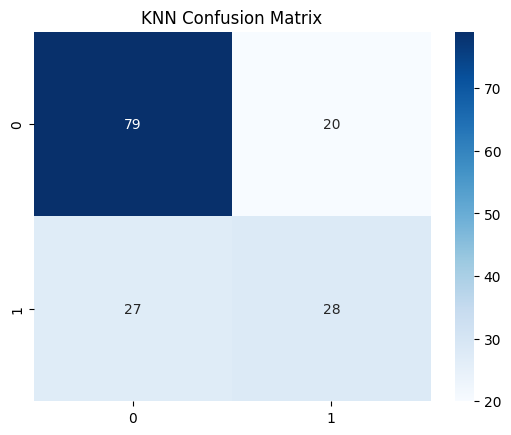


Model name: Decision Tree 
Accuracy: 0.7467532467532467
Precision: 0.625
Recall: 0.7272727272727273
F1-score: 0.6722689075630253

 Confusion Matrix:
 [[75 24]
 [15 40]]


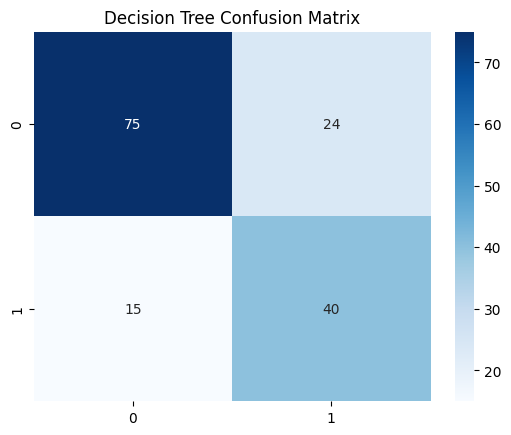


Model name: Random Forest 
Accuracy: 0.7207792207792207
Precision: 0.6071428571428571
Recall: 0.6181818181818182
F1-score: 0.6126126126126126

 Confusion Matrix:
 [[77 22]
 [21 34]]


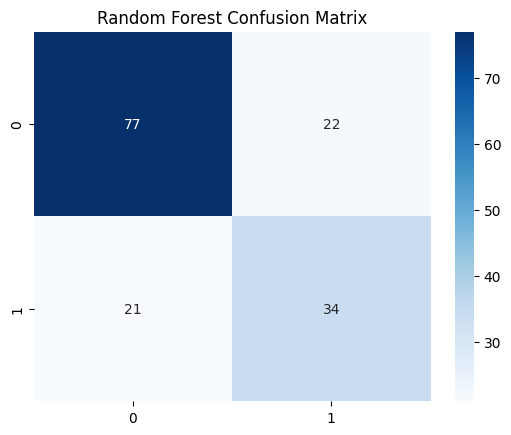


Model name: Naive Bayes 
Accuracy: 0.7662337662337663
Precision: 0.6610169491525424
Recall: 0.7090909090909091
F1-score: 0.6842105263157895

 Confusion Matrix:
 [[79 20]
 [16 39]]


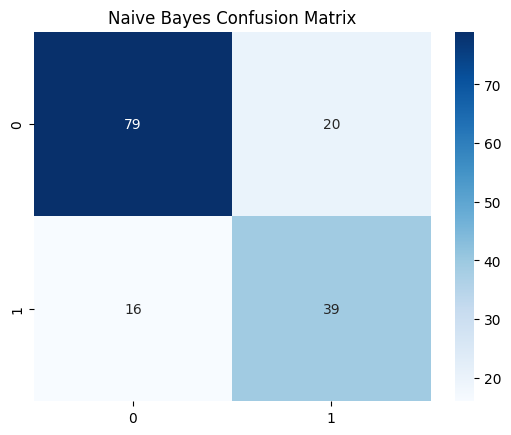

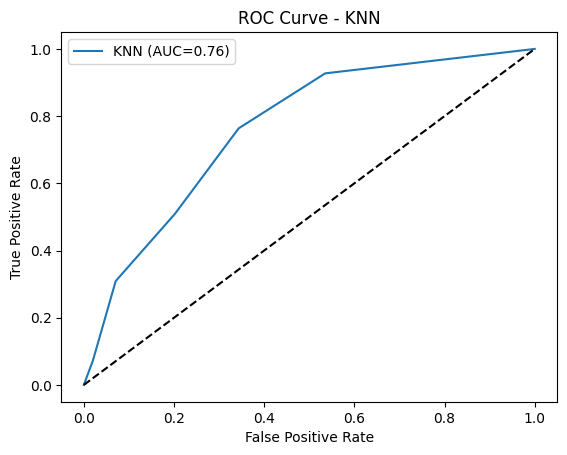

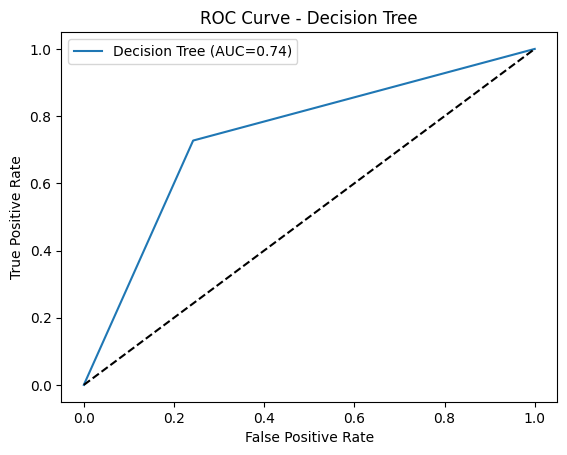

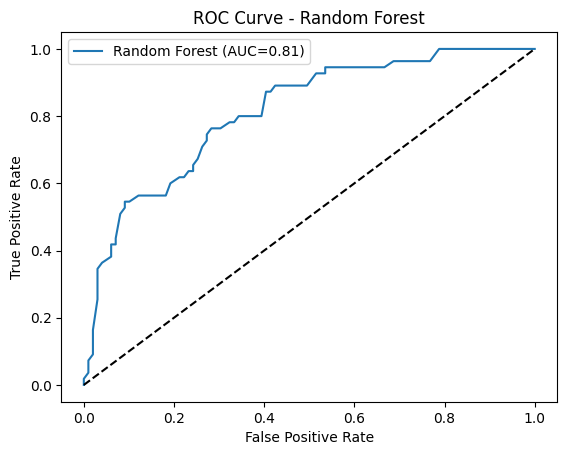

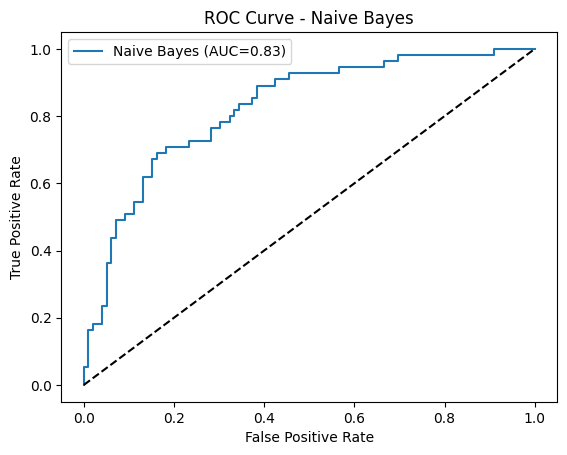

In [11]:
### Model evaluation

def print_metrics(y_true, y_pred, model_name):
    print(f"\nModel name: {model_name} ")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))

    #Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n Confusion Matrix:\n", cm)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

#Metrics for All Models
print_metrics(y_test, y_pred_knn, "KNN")
print_metrics(y_test, y_pred_dt, "Decision Tree")
print_metrics(y_test, y_pred_rf, "Random Forest")
print_metrics(y_test, y_pred_nb, "Naive Bayes")

#Import roc_auc_score for ROC Curve
from sklearn.metrics import roc_auc_score

#Define models dictionary
models = {
    "KNN": knn,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Naive Bayes": nb
}

#ROC Curve
for name, model in models.items():
    y_score = model.predict_proba(X_test_scaled if name=='KNN' else X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc = roc_auc_score(y_test, y_score)

    plt.plot(fpr, tpr, label=f'{name} (AUC={auc:.2f})')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend()
    plt.show()

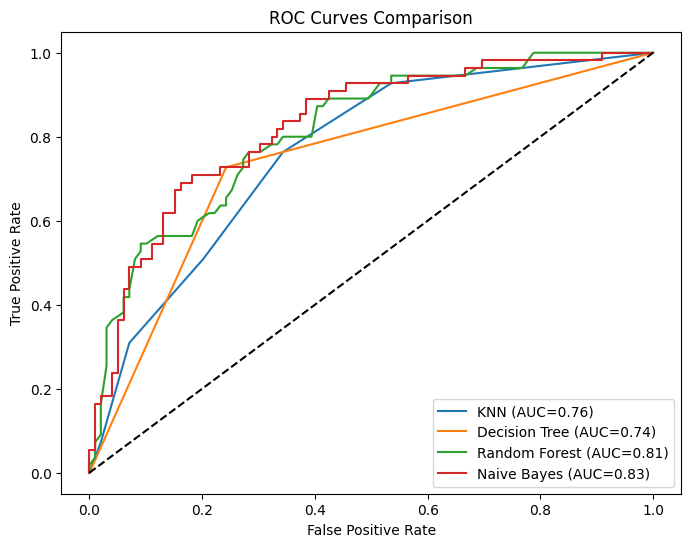

In [12]:
#All ROC Curves in One Plot
plt.figure(figsize=(8,6))

models = {
    "KNN": (knn, X_test_scaled),
    "Decision Tree": (dt, X_test),
    "Random Forest": (rf, X_test),
    "Naive Bayes": (nb, X_test)
}

for name, (model, X_t) in models.items():
    y_score = model.predict_proba(X_t)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()


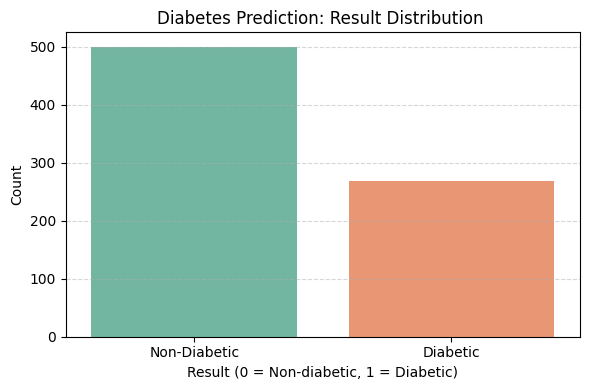

In [13]:
#Counting Class Values

import matplotlib.pyplot as plt
import seaborn as sns

# Plot class balance
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Outcome', hue='Outcome', palette='Set2', legend=False)
plt.title('Diabetes Prediction: Result Distribution ')
plt.xlabel('Result (0 = Non-diabetic, 1 = Diabetic)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()